<a href="https://colab.research.google.com/github/psychpraphool/6CS012-AI-and-ML-WeeklyWorkshop/blob/main/Praphool_Jung_Thakuri_2358579_workbook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**6CS012 - Artificial Intelligence and Machine Learning.

Image Compression and Decompression using PCA.**

**Getting Started with Image Processing with Python.**

**Introduction to Python Imaging Library(PIL)**

2.1 Exercise - 1:

Complete all the Task.
1. Read and display the image.

In [ ]:
from PIL import Image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image_colored = Image.open ("/content/drive/MyDrive/al and ML/Lenna_(test_image).png")

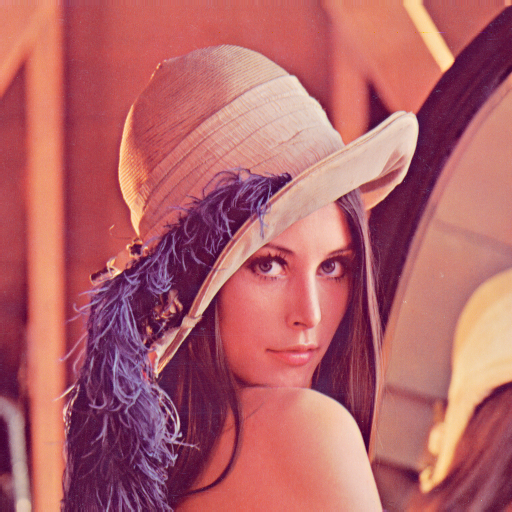

In [ ]:
display ( image_colored )

2. Display only the top left corner of 100x100 pixels.

      • Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

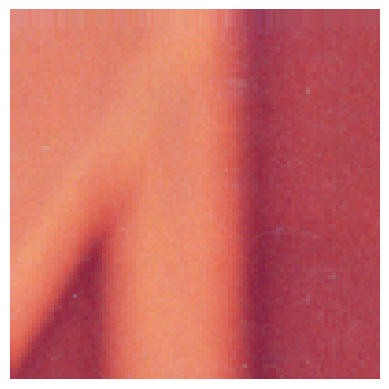

In [ ]:
image_array = np.array(image_colored)

top_left_corner = image_array[:100, :100]

plt.imshow(top_left_corner)
plt.axis('off')
plt.show()

3. Show the three color channels (R, G, B).

      • Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

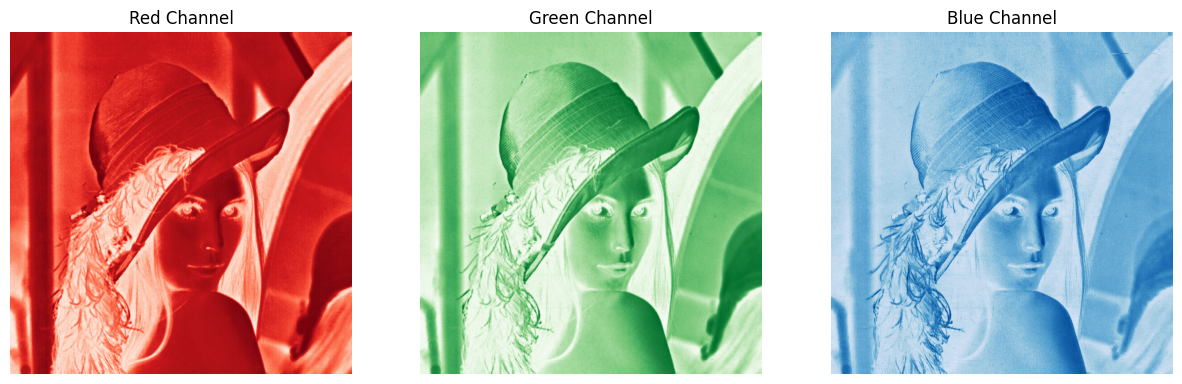

In [ ]:

image_array_colored = np.array(image_colored)

blue_channel = image_array_colored[:, :, 2]

red_channel = image_array_colored[:, :, 0]

green_channel = image_array_colored[:, :, 1]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(red_channel, cmap="Reds")
axes[0].set_title("Red Channel")
axes[0].axis('off')

axes[1].imshow(green_channel, cmap="Greens")
axes[1].set_title("Green Channel")
axes[1].axis('off')

axes[2].imshow(blue_channel, cmap="Blues")
axes[2].set_title("Blue Channel")
axes[2].axis('off')
plt.show()

4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:

    • Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

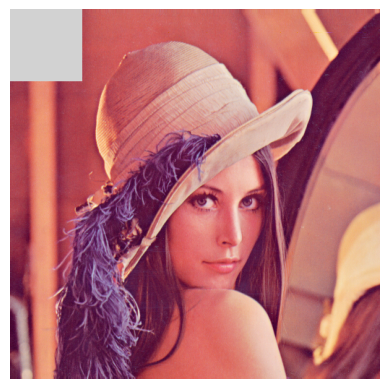

In [ ]:
image_array_colored[:100, :100] = 210

modified_image = Image.fromarray(image_array_colored)

plt.imshow(modified_image)
plt.axis('off')
plt.show()

2.2 Exercise - 2:

Complete all the Task.

  1. Load and display a grayscale image.

    • Load a grayscale image using the Pillow library.

    • Display the grayscale image using matplotlib.

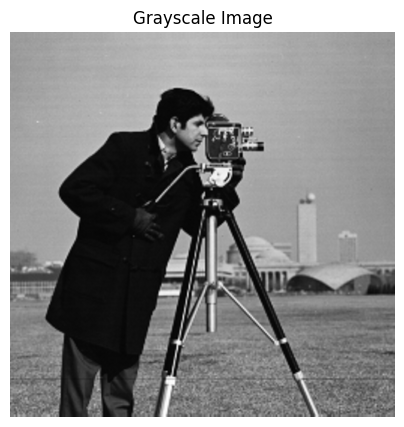

In [ ]:

image_path = "/content/drive/MyDrive/al and ML/cameraman.png"
gray_image = Image.open(image_path).convert("L")

plt.figure(figsize=(5, 5))
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

2. Extract and display the middle section of the image (150 pixels).

  • Extract a 150 pixel section from the center of the image using NumPy array slicing.

  • Display this cropped image using matplotlib.

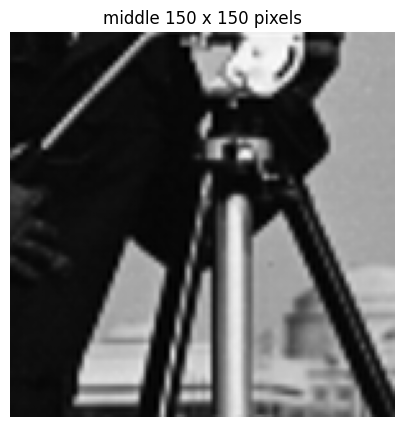

In [ ]:
image_array_colored2 = np.array(image_colored2)

height, width = image_array_colored2.shape

start_x = width // 2 - 75
end_x = width // 2 + 75
start_y = height // 2 - 75
end_y = height // 2 + 75

middle_section = image_array_colored2[start_y:end_y, start_x:end_x]

plt.figure(figsize=(5, 5))
plt.imshow(middle_section, cmap="gray")
plt.title("middle 150 x 150 pixels")
plt.axis("off")
plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

  • Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).
  
  • Display the resulting binary image.

(-0.5, 511.5, 511.5, -0.5)

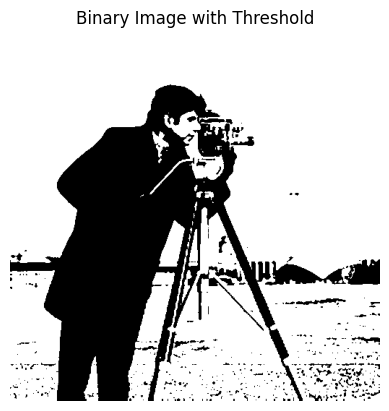

In [ ]:
image_array_gray = np.array(gray_image)

threshold = 100
binary_image = np.where(image_array_gray < threshold, 0, 255)

plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image with Threshold")
plt.axis('off')

4. Rotate the image 90 degrees clockwise and display the result.

  • Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.

  • Display the rotated image using matplotlib.

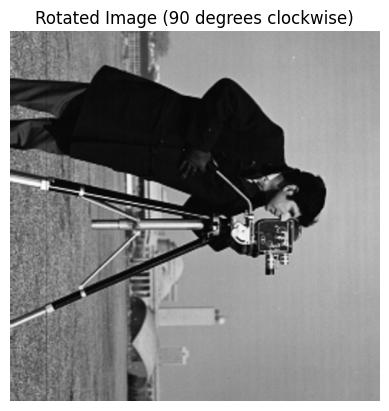

In [ ]:
rotated_image = image_colored2.rotate(-90, expand=True)

plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated Image (90 degrees clockwise)")
plt.axis('off')
plt.show()

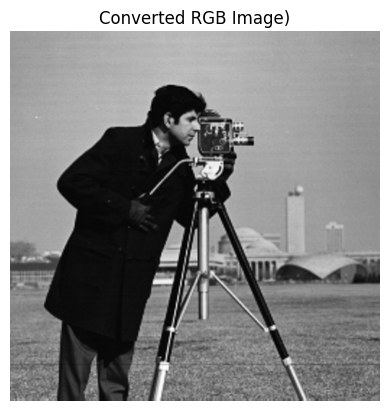

In [ ]:
grayscale_array = np.array(image_colored2)

rgb_array = np.zeros((grayscale_array.shape[0], grayscale_array.shape[1], 3), dtype=np.uint8)

rgb_array[:, :, 0] = grayscale_array
rgb_array[:, :, 1] = grayscale_array
rgb_array[:, :, 2] = grayscale_array
plt.imshow(rgb_array, cmap='gray')
plt.title("Converted RGB Image")
plt.axis('off')
plt.show()

**3 Image Compression and Decompression using PCA.
**

In this exercise, build a PCA from scratch using explained variance method for image compression task.
You are expected to compute the necessary matrices from the scratch. Dataset: Use image of your
choice.

1. Load and Prepare Data:


        • Fetch an image of you choice.{If colour convert to grayscale}
        
        • Center the dataset - Standaridze the Data.

        • Calculate the covaraince matrix of the Standaridze data.

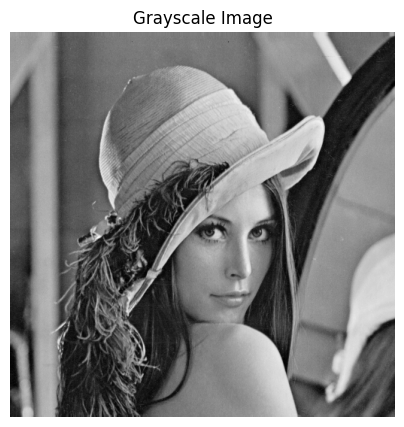

In [ ]:
image_path= "/content/drive/MyDrive/al and ML/lena_gray.gif"
gray_image = Image.open(image_path).convert("L")
plt.figure(figsize=(5,5))
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


2. Eigen Decomposition and Identifying Principal Components:

    • Compute Eigen Values and Eigen Vectors.

    • Sort the eigenvalues in descending order and choose the top k eigenvectors
    corresponding to the highest eigenvalues.

    • Identify the Principal Components with the help of cumulative Sum plot.

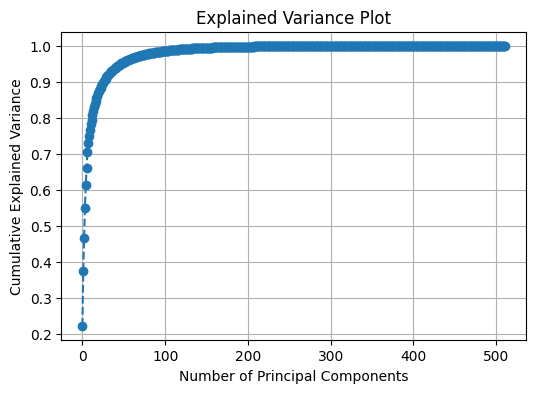

In [ ]:
gray_array = np.array(gray_image)

mean = np.mean(gray_array, axis=0)
std = np.std(gray_array, axis=0)
standardized_data = (gray_array - mean) / std

cov_matrix = np.cov(standardized_data, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

explained_variance_ratio = np.cumsum(eigenvalues) / np.sum(eigenvalues)
plt.figure(figsize=(6,4))
plt.plot(explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance Plot")
plt.grid()
plt.show()

3. Reconstruction and Experiment:

    • Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
    tors(PCs) to obtain a lower-dimensional representation.

    • Experiments: Pick Four different combination of principal components with various ex-
    plained variance value and compare the result.

    • Display the Results and Evaluate.

In [ ]:
def reconstruct_image(k):
    top_k_eigenvectors = eigenvectors[:, :k]
    transformed_data = np.dot(standardized_data, top_k_eigenvectors)
    reconstructed_data = np.dot(transformed_data, top_k_eigenvectors.T)
    reconstructed_image = (reconstructed_data * std) + mean
    return np.clip(reconstructed_image, 0, 255).astype(np.uint8)

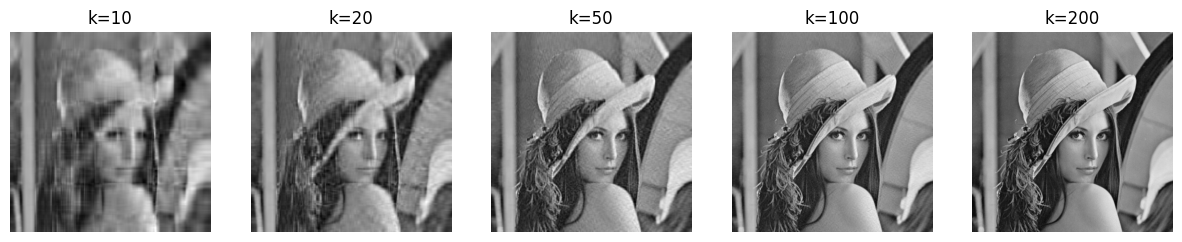

In [ ]:
k_values = [10, 20, 50, 100, 200]
fig, axes = plt.subplots(1, len(k_values), figsize=(15,5))
for i, k in enumerate(k_values):
    reconstructed_image = reconstruct_image(k)
    axes[i].imshow(reconstructed_image, cmap="gray")
    axes[i].set_title(f"k={k}")
    axes[i].axis("off")
plt.show()

k = 10:

The reconstructed image is heavily blurred and lacks significant details.
Only 10 principal components are used, meaning much of the original image information is lost.
The edges and key features are barely visible.
k = 20:

Slight improvement in detail compared to
𝑘
=
10
k=10.
The general shape and structure start to appear, but fine details are still missing.
The image remains blurry and lacks sharpness.

k = 50:

Noticeable improvement in image quality.
The major structural features become clearer.
Some finer details start to emerge, but the image is still not perfectly sharp.

k = 100:

A much clearer and sharper image.
Most of the significant details are now reconstructed.
The image closely resembles the original but might still have minor distortions.

k = 200:

Almost indistinguishable from the original image.
Retains most of the fine details and sharpness.
Very little difference from the actual image can be observed.